# Content Header

#### #1 Import all necessary libraries.

#### #2 Import cleaned data.

#### #3 Create elbow curve.

#### #4 Make informed decision about the number of clusters to use in k-means algorithm.

#### #5 Run k-means algorithm.

#### #6 Create new column with resulting clusters.

#### #7 Create visualizations to plot variables against each other to see results in terms of clusters.

#### #8 Discuss how and why the clusters make sense.

#### #9 Calculate the descriptive statistics for your clusters using the groupby() function and discuss findings.

#### #10 Propose what the results could be useful for in future steps of an analytics pipeline.

# #1 import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:/Users/13019/Documents/Emmanuel/Data Analysis/Data Immersion/6.x/6.5'

In [10]:
df = pd.read_csv(os.path.join(path, 'Provisional_COVID-19_Deaths_by_Sex_and_Age_6_4_No_Categories.csv')) 

### #2 Checking pre-cleaned imported data

In [11]:
df.head()

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,2020,2,0,40,0,0,0,25
1,2020,3,0,24,18,0,0,25
2,2020,6,0,36,0,0,0,25
3,2020,9,0,32,18,0,0,25
4,2020,10,0,38,18,0,0,25


In [12]:
df.shape

(25069, 8)

# #3 Run Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\13019\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\13019\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\13019\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\13019\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\13019\anaconda3\lib\site-packages\sklearn\clust

[-22880139843.61226,
 -9072990747.395689,
 -4329925251.004026,
 -2954341221.819546,
 -2235637065.200948,
 -1807304711.0914838,
 -1557116187.98737,
 -1347758748.0082245,
 -1167494477.539686]

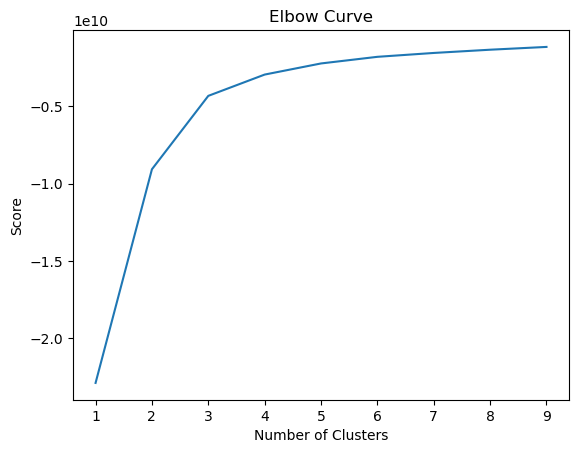

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# #4 Making a decision about number of clusters to use

### It looks like the curve stops increasing sharply after 3 clusters. So, I will be using 3.

# #5 Running K-means algorithm

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\13019\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# #6 Attach clusters column to dataframe

In [25]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\13019\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
df.head()

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",clusters
0,2020,2,0,40,0,0,0,25,1
1,2020,3,0,24,18,0,0,25,1
2,2020,6,0,36,0,0,0,25,1
3,2020,9,0,32,18,0,0,25,1
4,2020,10,0,38,18,0,0,25,1


In [27]:
df['clusters'].value_counts()

1    20816
0     3733
2      520
Name: clusters, dtype: int64

# #7 Create different visualizations to see results in terms of clusters

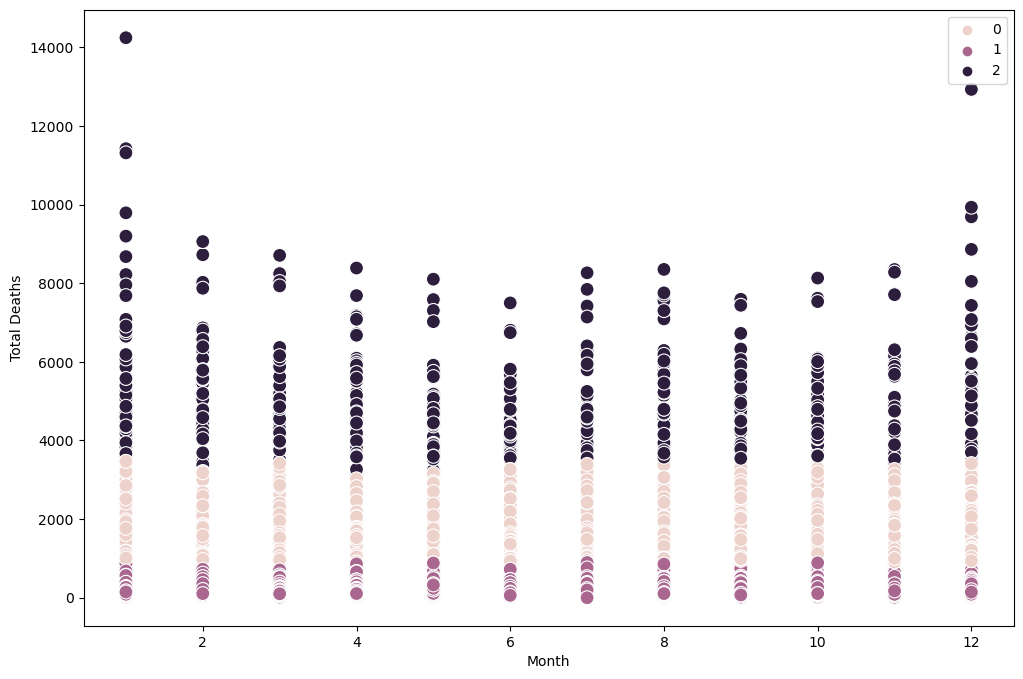

In [28]:
# Plot the clusters for the "Total Deaths" and "Month" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Month'], y=df['Total Deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Month') # Label x-axis.
plt.ylabel('Total Deaths') # Label y-axis. 
plt.show() 

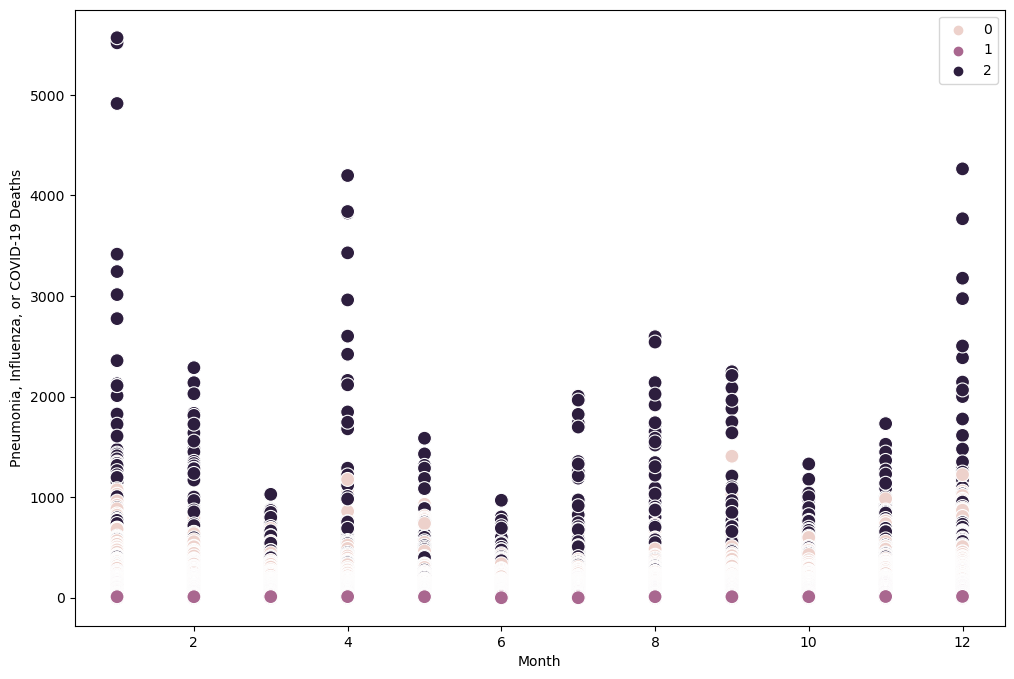

In [32]:
# Plot the clusters for the "Pneumonia, Influenza, or COVID-19 Deaths" and "Month" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Month'], y=df['Pneumonia, Influenza, or COVID-19 Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Month') 
plt.ylabel('Pneumonia, Influenza, or COVID-19 Deaths') 
plt.show()

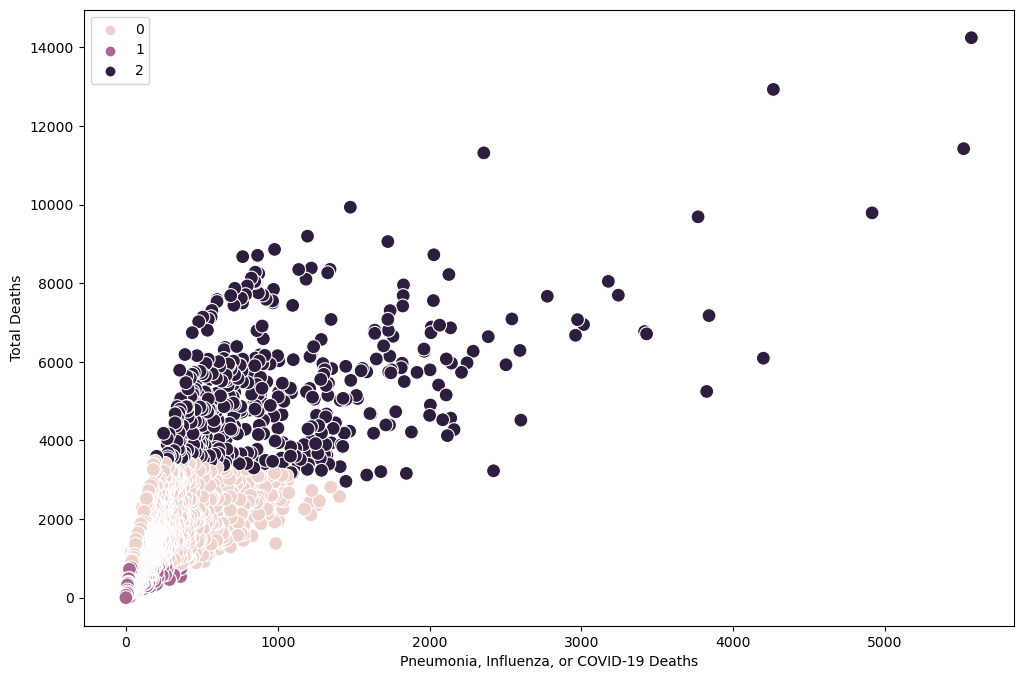

In [29]:
# Plot the clusters for the "Pneumonia, Influenza, or COVID-19 Deaths" and "Total Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Pneumonia, Influenza, or COVID-19 Deaths'], y=df['Total Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Pneumonia, Influenza, or COVID-19 Deaths') 
plt.ylabel('Total Deaths') 
plt.show()

In [ ]:
# Plot the clusters for the "Pneumonia, Influenza, or COVID-19 Deaths" and "Total Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Pneumonia, Influenza, or COVID-19 Deaths'], y=df['Total Deaths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Pneumonia, Influenza, or COVID-19 Deaths') 
plt.ylabel('Total Deaths') 
plt.show()

# #8 Discuss how and why the clusters make sense.

### The first set of clusters seems to be saying:
"1" grouping is about 0 - 1000 total deaths, 

"0" is 1000 - 4000,

"2" is 4000+ total deaths. 

Also that the highest death counts are between December and January.

### In the second chart: 

the "1" grouping seems to have a ratio of about 2 total deaths for every 1 illness death.

the "0" grouping could be anywhere from 3-6 total deaths per illness deaths, on average, given that the bulk of the cluster is before 500 Iillness deaths but goes up to ~3500.

the "2" grouping can have an even higher ratio as there is a bulk before 1000 illness deaths that goes up to about 6000 total deaths. plus there are other outliers.


# #9 Calculate the descriptive statistics for your clusters using groupby() function discuss your findings.

In [30]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
df.groupby('cluster').agg({ 
                         'Month':['mean', 'median'], 
                         'Pneumonia, Influenza, or COVID-19 Deaths':['mean', 'median'],
                          'Total Deaths':['mean', 'median']})

Month        Pneumonia, Influenza, or COVID-19 Deaths         \
                 mean median                                     mean median   
cluster                                                                        
dark purple  6.153846    6.0                               952.138462  706.5   
pink         6.140370    6.0                               233.461827  175.0   
purple       6.083013    6.0                                25.921983   25.0   

            Total Deaths          
                    mean  median  
cluster                           
dark purple  5127.798077  4794.0  
pink         1567.858023  1402.0  
purple        188.016478   152.0

### We can compare the means of each color to find the ratio of each cluster. 

The dark purple cluster has an average ratio of about 7.2:1

The pink cluster has an average ratio of about 6.7:1

The purple cluster has an average ratio of about 5.3:1 

This shows that the ratios I guessed where far off.

# #10 Proposing what theses reults could be useful for in the future steps of an analytics pipeline

This information can tell us when in the year we are most at risk for illness deaths compared to general deaths. It can also tell us what proportion of total deaths are due to certain illnesses and when those can be expected throughout the year. 